# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from geopy.geocoders import Nominatim
import time
from pprint import pprint
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from tensorflow.keras import regularizers


# CONFIGURATION OF LIBRARIES

In [2]:
plt.figure(figsize=(14,8))

pd.set_option('display.max_columns', 50)

<Figure size 1008x576 with 0 Axes>

# READING DATA FROM SOURCE

Both datasets are stored in the same direcotry with script as csv files. 

In [3]:
dfPolicyData = pd.read_csv("PolicyData.csv", delimiter = ";", encoding='latin-1')
dfPolicyData.set_index("policy_guid", inplace = True)

dfInvoiceData = pd.read_csv("InvoiceData.csv", delimiter = ";")
dfInvoiceData.set_index("invoice_guid", inplace = True)


Premium and amount premium fields are not numberic. They are converted from object to float

In [4]:
dfInvoiceData["amount_premium"] = dfInvoiceData["amount_premium"].apply(lambda x: x.replace(',','.'), ).astype(float, errors = 'raise')
dfPolicyData["Premium"] = dfPolicyData["Premium"].apply(lambda x: x.replace(',','.'), ).astype(float, errors = 'raise')

In [5]:
dfPolicyData.head()

,Country,VehicleType,VehicleUsage,Power,Weight,VehicleFirstRegistrationYear,Mark,Model,Deductible_general,Fire,Theft,Natural_disasters,Road_assistance,Total_loss,Vandalism,Glass,Accident,Replacement_car,Gender,ClientBirthday,Region,BMClassMOD,Leasing,PolicyIssueDate,PolicyStartDate,PolicyEndDate,PolicyActualEndDate,Nb_of_payments,Premium,Channel,FuelType,avgFuelConsumption,DriveTrain,RenewalIndicator,IsRenewed,BalticRating,Terminated,sales_type
policy_guid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
{E4FD3CD8-4141-4E55-A74C-C983ED7EFD8E},EE,Passenger car,Regular,108,1895,2007,TOYOTA,AVENSIS,191.0,1,1,1,0,1,1,0,1,0,M,1983-10-19 00:00,HARJUMAA,0,0,2015-09-13 00:00,2015-09-13 00:00,2016-09-12 00:00,2016-05-24 00:00,12,261.09,Lean Operator,Gasoline,8.0,Front,0,0,3,1,Renewal
{CD63AD22-81C2-4A86-8E56-AF1084BE49E3},EE,Passenger car,Regular,120,2050,2008,VOLVO,S60,191.0,1,1,1,0,1,1,0,1,0,M,1959-08-11 00:00,PÄRNUMAA,0,0,2015-09-23 00:00,2015-09-23 00:00,2016-09-22 00:00,2015-10-22 00:00,12,297.22,Lean Operator,Diesel,7.0,Front,0,1,0,1,Renewal
{480DDB89-BA11-4219-A92C-330ABC6BE1EC},EE,Passenger car,Regular,125,1970,2012,VOLKSWAGEN,CC,191.0,1,1,1,1,1,1,1,1,0,M,1966-10-17 00:00,HARJUMAA,0,1,2015-09-14 00:00,2015-09-14 00:00,2016-09-13 00:00,2016-09-13 00:00,4,534.22,Direct,Diesel,5.0,Front,0,0,0,0,New sale
{74A1885E-CC4D-435B-B7CF-CAD0287FA814},EE,Passenger car,Regular,85,2510,2007,VOLKSWAGEN,SHARAN,191.0,1,1,1,1,1,1,1,1,0,M,1954-03-08 00:00,TARTUMAA,A1,0,2015-09-20 00:00,2015-09-20 00:00,2016-09-19 00:00,2015-10-04 00:00,12,275.24,Direct,Missing,NaN,Missing,0,1,5,1,New sale
{FF6D78C8-B660-4D58-8A9D-0FD6E32E2A03},EE,Passenger car,Regular,77,1780,2013,SKODA,OCTAVIA,191.0,1,0,1,1,1,1,1,1,0,M,1944-07-30 00:00,JÕGEVAMAA,0,0,2015-11-23 00:00,2015-11-23 00:00,2016-11-22 00:00,2016-04-22 00:00,12,239.77,Direct,Gasoline,NaN,Missing,0,0,2,1,New sale


In [6]:
dfInvoiceData.head()

,payment_status,policy_guid,amount_premium,due_date,paid_date
invoice_guid,,,,,
{55B3ABD8-B64E-498E-A617-3C6E88C4D06F},Paid,{480DDB89-BA11-4219-A92C-330ABC6BE1EC},133.55,2015-12-13 00:00,2015-12-14 00:00
{40544861-68D0-462F-AF9C-8740B2316620},Paid,{480DDB89-BA11-4219-A92C-330ABC6BE1EC},133.55,2016-03-13 00:00,2016-03-14 00:00
{B3C6B66F-280E-413B-8FEE-A804903D2FE8},Paid,{480DDB89-BA11-4219-A92C-330ABC6BE1EC},133.57,2015-09-14 00:00,2015-09-14 00:00
{674FDC26-D0E8-4C20-BB86-1AE9979EB1AA},Paid,{480DDB89-BA11-4219-A92C-330ABC6BE1EC},133.55,2016-06-13 00:00,2016-06-13 00:00
{EE21ECF7-7B70-4DA3-B663-87371073DE18},Paid,{74A1885E-CC4D-435B-B7CF-CAD0287FA814},23.01,2015-09-19 00:00,2015-09-21 00:00


# DATA PREPROCESSING

dfModelData that represents all the possible attributes for input and target features.

In [7]:
dfModelData = dfPolicyData.copy()

# MISSING DATA INPUTATION

In [8]:
def ReplaceMissingDataWithClassifier(dfModelData, aCategoricalFeatures, aContinuousFeatures, sTargetFeature):

    dfModelDataCopy = dfModelData.copy()
    
    aFeaturesX = []
    
    for i in range(len(aCategoricalFeatures)):
        sCategoricalFeature = aCategoricalFeatures[i]

        # to avoid "other" value for multiple attributes
        dfMaskOther = dfModelDataCopy[sCategoricalFeature] == "OTHER"
        
        dfModelDataCopy.loc[dfMaskOther, sCategoricalFeature] = "OTHER_" + str(sCategoricalFeature)
        
        dfCategoricalFeatureClassified = pd.get_dummies(dfModelDataCopy[sCategoricalFeature])
        
        dfModelDataCopy = dfModelDataCopy.join(dfCategoricalFeatureClassified, on= "policy_guid")
        
        aFeaturesX = np.concatenate([aFeaturesX, dfCategoricalFeatureClassified.columns])
 
        
    aFeaturesX = np.concatenate([aFeaturesX, aContinuousFeatures])

    dfTargetFeatureClassified= pd.get_dummies(dfModelDataCopy[sTargetFeature])
    
    dfModelDataCopy = dfModelDataCopy.join(dfTargetFeatureClassified, on= "policy_guid")

    aFeaturesY = np.delete(dfTargetFeatureClassified.columns, np.where(dfTargetFeatureClassified.columns.astype(str) == "Missing"))
    aFeaturesY = np.delete(aFeaturesY, np.where(dfTargetFeatureClassified.columns.isna()))
    
    dfMaskToMissingData = (dfModelData[sTargetFeature].astype(str) == "Missing") | (dfModelData[sTargetFeature].isna())
    dfMissingData = dfModelDataCopy.loc[dfMaskToMissingData]
    
    dfNonMissingData = dfModelDataCopy.drop(dfMissingData.index, inplace = False)
    
    dfX = dfNonMissingData[aFeaturesX]
    dfY = dfNonMissingData[aFeaturesY]

    X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=0.3, random_state=1)

    oDecTreeModel =  DecisionTreeClassifier()
    oDecTreeModel.fit(X_train, y_train)

    y_pred = oDecTreeModel.predict(X_test)

    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

    print('Recall: ', metrics.recall_score(y_test, y_pred,zero_division=0,  average = 'micro'))

    print('Precision: ', metrics.precision_score(y_test, y_pred,zero_division=0,  average = 'micro'))

    print('F1-Score: ', metrics.f1_score(y_test, y_pred,zero_division=0,  average = 'micro'))
    
    dfX_Missing = dfMissingData[aFeaturesX]
    aPredictionsForMissing = oDecTreeModel.predict(dfX_Missing)
    dfPredictionsForMissing = pd.DataFrame(data = aPredictionsForMissing, columns = aFeaturesY, index = dfMissingData.index)
    
    aPredictedLabels = dfPredictionsForMissing.idxmax(axis=1)
    
    dfModelData.loc[dfMissingData.index,sTargetFeature] = aPredictedLabels

Columns that are NaN in policy dataset

In [9]:
dfPolicyData.columns[dfPolicyData.isna().any()].tolist()

['Deductible_general', 'ClientBirthday', 'BMClassMOD', 'avgFuelConsumption']

Columns that are 'Missing' in policy dataset

In [10]:
dfMissing = dfPolicyData.astype(str) == "Missing"
dfPolicyData.columns[dfMissing.any()].tolist()

['Region', 'FuelType', 'DriveTrain']

Columns that are NaN in invoice dataset

In [11]:
dfInvoiceData.columns[dfInvoiceData.isna().any()].tolist()

[]

Columns that are 'Missing' in invoice dataset

In [12]:
dfMissing = dfInvoiceData.astype(str) == "Missing"
dfInvoiceData.columns[dfMissing.any()].tolist()

[]

## Deductible_general

There are only 2 rows where Deductible_general is missing. 

Since they are relatively small amount of rows for this dataset, these rows are deleted.

In [13]:
dfMissingDecutibleGeneral = dfModelData[dfModelData["Deductible_general"].isna()]
dfModelData.drop(dfMissingDecutibleGeneral.index, inplace = True)

## ClientBirthday

There are only 43 rows where ClientBirthday is missing.

Since they are relatively small amount of rows for this dataset, these rows are deleted.

In [14]:
dfMissingClientBirthday = dfModelData[dfModelData["ClientBirthday"].isna()]
dfModelData.drop(dfMissingClientBirthday.index, inplace = True)

## BMClassMOD

There are only 14 rows where BMClassMOD is missing.

Since they are relatively small amount of rows for this dataset, these rows are deleted.

In [15]:
dfMissingBmClassMod = dfModelData[dfModelData["BMClassMOD"].isna()]
dfModelData.drop(dfMissingBmClassMod.index, inplace = True)

## avgFuelConsumption

There are 27927 rows where avgFuelConsumption is missing.

Since it s a big amount of rows, correlation between avgFuelConsumption and other fields are calculated for non-missing data.

It is found out that avgFuelConsumption has fair linear correlation with the attributes of Power, Weight,  VehicleFirstRegistrationYear and Premium.

Missing data is filled based on random forest classifier model since avgFuelConsumption field contains cardinal-categorical data.

In [16]:
dfMissingAvgFuelConsumption = dfModelData[dfModelData["avgFuelConsumption"].isna()]
dfNonMissingAvgFuelConsumption = dfModelData.drop(dfMissingAvgFuelConsumption.index, inplace = False)

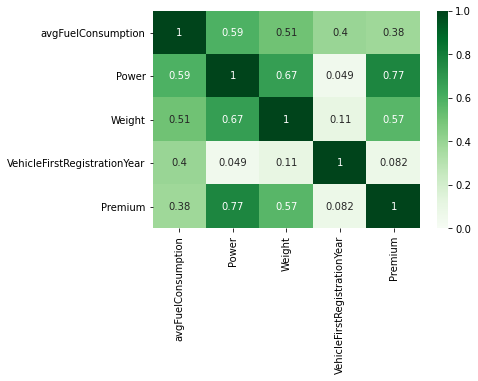

In [17]:
aUniqueAvgFuelConsumption = dfNonMissingAvgFuelConsumption["avgFuelConsumption"].unique()

dfAvgFuelConsumptionClassified = pd.get_dummies(dfNonMissingAvgFuelConsumption["avgFuelConsumption"])
dfNonMissingAvgFuelConsumption[aUniqueAvgFuelConsumption] = dfAvgFuelConsumptionClassified

dfCorr = dfNonMissingAvgFuelConsumption[["avgFuelConsumption", "Power", "Weight", "VehicleFirstRegistrationYear", "Premium"]].corr()

sns.heatmap(dfCorr.abs(), vmin=0, vmax=1, annot = True, cmap="Greens")

In [18]:
ReplaceMissingDataWithClassifier(dfModelData, 
                                ['VehicleType', 'VehicleUsage', 'Mark', 'Model'], 
                                ['Power', 'Weight','VehicleFirstRegistrationYear'], 
                                'avgFuelConsumption')

Accuracy:  0.9316989176779272
Recall:  0.9316989176779272
Precision:  0.935996705107084
F1-Score:  0.9338428665351742


## Region

There are 6727 rows (aprx. 9% of whole dataset).

According to given attributes, it is difficult to build a pattern that can help to predict region.

Regional data may give information about person's financial information. That's why, this attribue is kept in model data but missing rows have been removed from dataset.

In [19]:
dfPolicyDataWithMissingRegion = dfModelData[dfModelData["Region"] == "Missing"]
dfModelData.drop(dfPolicyDataWithMissingRegion.index, inplace = True)

## FuelType

For missing fuel types, we can use policy dataset as a "vehicle" dataset where we can build a classification model to identify fuel type. Logically, fuel type is related with vehicle attributes related features such as 'VehicleType', 'VehicleUsage', 'Power', 'Weight','VehicleFirstRegistrationYear', 'Mark', 'Model'

In [20]:
ReplaceMissingDataWithClassifier(dfModelData, 
                                ['VehicleType', 'VehicleUsage', 'Mark', 'Model'], 
                                ['Power', 'Weight','VehicleFirstRegistrationYear'], 
                                'FuelType')

Accuracy:  0.9884256658051467
Recall:  0.9884256658051467
Precision:  0.9884256658051467
F1-Score:  0.9884256658051467


## DriveTrain

There are 22558 rows that have missing information for this field. Since it s a around 36% of whole data and 'DriveTrain' depends on vehicle attributes, we can replace missing data with a classifier.

In [21]:
ReplaceMissingDataWithClassifier(dfModelData, 
                                ['VehicleType', 'VehicleUsage', 'Mark', 'Model'], 
                                ['Power', 'Weight','VehicleFirstRegistrationYear'], 
                                'DriveTrain')

Accuracy:  0.9881245228602935
Recall:  0.9881245228602935
Precision:  0.9887115939568834
F1-Score:  0.9884179712358406


# FEATURE ENCODING

"One-Hot Encoding" is applied when:

The categorical feature is not ordinal.
The number of categorical features is less so one-hot encoding can be effectively applied

"Label Encoding" is applied when:

The categorical feature is ordinal.
The number of categories is quite large as one-hot encoding can lead to high memory consumption

source: 

https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor

In [22]:
def aCreateOneHotEncoding(dfModelData, sCategoricalFeature):
        
    dfMaskOther = dfModelData[sCategoricalFeature] == "OTHER"
        
    dfModelData.loc[dfMaskOther, sCategoricalFeature] = "OTHER_" + str(sCategoricalFeature)
    
    aUniqueValues = dfModelData[sCategoricalFeature].unique()
    
    dfFeatureClassified = pd.get_dummies(dfModelData[sCategoricalFeature])

    dfModelData = dfModelData.join(dfFeatureClassified, on= "policy_guid")

    dfModelData.drop([sCategoricalFeature], axis = 1 , inplace = True)

    return aUniqueValues, dfModelData
    

In [23]:
def aCreateLabelEncoding(dfModelData, sCategoricalFeature):

    oLabelEncoder = LabelEncoder()

    oLabelEncoder.fit(dfModelData[sCategoricalFeature])
    
    dfModelData[sCategoricalFeature] =oLabelEncoder.transform(dfModelData[sCategoricalFeature])
    
    return oLabelEncoder.classes_, dfModelData
    

## TARGET_LABEL

Target labels that represent late payment of invoices of corresponding policy is generated based on following criteria:

1: Paid late at least once

0: Paid always on time

In [24]:
aConditions = [
    (dfInvoiceData["due_date"] < dfInvoiceData["paid_date"]),
    (dfInvoiceData["due_date"] >= dfInvoiceData["paid_date"])
]

dfInvoiceData["isInvoiceLatePaid"] = np.select(aConditions, [1, 0])

oInvocieGroupByPolicy = dfInvoiceData[["policy_guid", "isInvoiceLatePaid"]].groupby(["policy_guid"])

dfInvoiceIssueStatistics = oInvocieGroupByPolicy.agg(["sum"])

dfInvoiceIssueStatistics = dfInvoiceIssueStatistics["isInvoiceLatePaid"] 

dfInvoiceIssueStatistics.columns = ["number_of_late_payments"]

aTargetLabels = [1, 0]
aConditions = [
    (dfInvoiceIssueStatistics["number_of_late_payments"] >= 1),
    (dfInvoiceIssueStatistics["number_of_late_payments"] == 0)
]

dfTargetLabels = pd.DataFrame(data = np.select(aConditions, aTargetLabels), index = dfInvoiceIssueStatistics.index, columns = ["TARGET_LABEL"])

dfModelData = dfTargetLabels.join(dfModelData,  on= "policy_guid", how = "inner")

In [25]:
dfModelData.head()

,TARGET_LABEL,Country,VehicleType,VehicleUsage,Power,Weight,VehicleFirstRegistrationYear,Mark,Model,Deductible_general,Fire,Theft,Natural_disasters,Road_assistance,Total_loss,Vandalism,Glass,Accident,Replacement_car,Gender,ClientBirthday,Region,BMClassMOD,Leasing,PolicyIssueDate,PolicyStartDate,PolicyEndDate,PolicyActualEndDate,Nb_of_payments,Premium,Channel,FuelType,avgFuelConsumption,DriveTrain,RenewalIndicator,IsRenewed,BalticRating,Terminated,sales_type
policy_guid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
{00002943-8C7A-4293-9715-0E4F09C6311D},0,EE,Passenger car,Regular,123,2040,2012,SUBARU,LEGACY,200.0,0,0,0,0,0,0,0,0,0,F,1962-12-05 00:00,HARJUMAA,0,1,2017-01-25 00:00,2017-01-25 00:00,2018-01-24 00:00,2018-01-24 00:00,1,469.55,Broker,Gasoline,8.0,4Drive,0,1,0,0,Renewal
{000118B2-9E9C-4A98-A338-DC31DD7C1F59},1,EE,Passenger car,Regular,127,2850,2009,TOYOTA,LAND CRUISER,200.0,0,0,0,0,0,0,0,0,0,M,1954-12-13 00:00,IDA-VIRUMAA,A1,0,2016-12-30 00:00,2016-12-30 00:00,2017-12-29 00:00,2017-12-29 00:00,12,590.53,Direct,Diesel,9.0,4Drive,1,1,4,0,Upsale
{0001A384-9AAC-44DF-BE77-D247F880B80B},1,EE,Passenger car,Regular,61,1470,2004,HONDA,JAZZ,200.0,0,0,0,0,0,0,0,0,0,M,1942-07-20 00:00,HARJUMAA,0,0,2017-07-28 00:00,2017-07-28 00:00,2018-07-27 00:00,2018-07-27 00:00,1,246.55,Direct,Gasoline,5.0,Front,1,0,0,0,New sale
{0001C1D4-FB9E-4DD3-A539-1F53C3E2BDD9},1,EE,Passenger car,Regular,88,1730,2014,SUZUKI,SX4,191.0,1,0,1,1,1,1,1,1,0,F,1965-09-06 00:00,HARJUMAA,0,0,2014-05-31 00:00,2014-05-31 00:00,2015-05-30 00:00,2015-05-30 00:00,1,282.83,Direct,Gasoline,5.0,Front,0,1,0,0,New sale
{00027C87-4647-41EB-A406-6EB60D5D83D8},0,EE,Passenger car,Regular,80,1693,2002,PEUGEOT,307,191.0,1,0,1,1,1,1,1,1,0,F,1961-07-12 00:00,HIIUMAA,0,0,2015-02-19 00:00,2015-02-19 00:00,2016-02-18 00:00,2016-02-18 00:00,12,251.50,Direct,Gasoline,7.0,Front,1,1,3,0,New sale


## Country

"Country" field is same in whole dataset. It is not considered in model dataset.

In [26]:
dfModelData["Country"].unique()

array(['EE'], dtype=object)

In [27]:
dfModelData.drop(["Country"], axis = 1 , inplace = True)

## Weight

Found that some passenger cars have quite big amount of outlier.

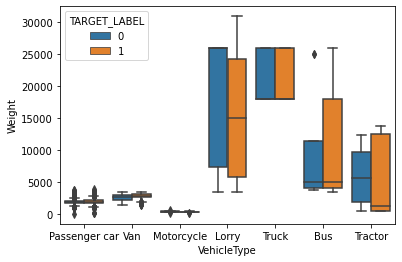

In [28]:
sns.boxplot(data=dfModelData, x="VehicleType", y="Weight" , hue="TARGET_LABEL")

There are low outlier points in Diesel, Passenger cars. 

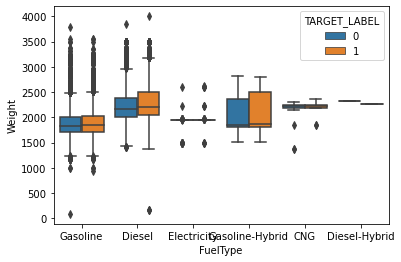

In [29]:
dfTest = dfModelData[dfModelData["VehicleType"] == "Passenger car"]

sns.boxplot(data=dfTest, x="FuelType", y="Weight" , hue="TARGET_LABEL")


When focused on Opel Meriva 2013, it is registered as 88 Kg and Mercedes Benz C200 2011 is registered as 173 Kg , their weight are not logical. These rows are droped from model dataset.

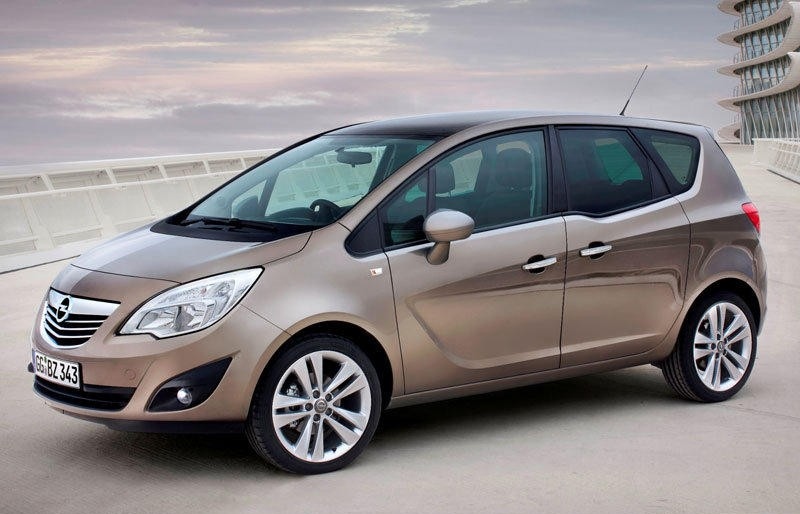
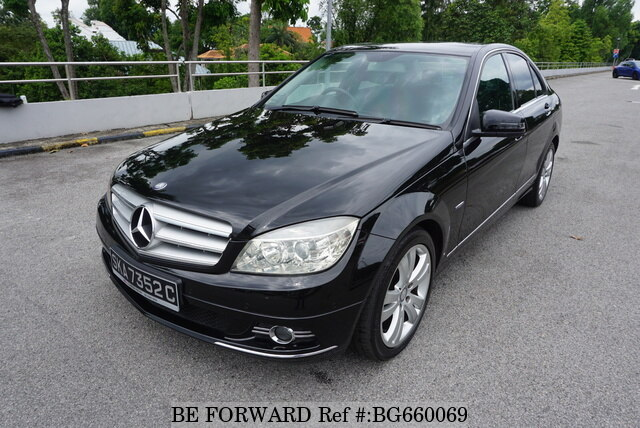

In [30]:
dfDieselCarsLessThen500Kg = dfModelData[(dfModelData["FuelType"] == "Diesel") & (dfModelData["VehicleType"] == "Passenger car") & (dfModelData["Weight"] < 500) ]
dfDieselCarsLessThen500Kg


,TARGET_LABEL,VehicleType,VehicleUsage,Power,Weight,VehicleFirstRegistrationYear,Mark,Model,Deductible_general,Fire,Theft,Natural_disasters,Road_assistance,Total_loss,Vandalism,Glass,Accident,Replacement_car,Gender,ClientBirthday,Region,BMClassMOD,Leasing,PolicyIssueDate,PolicyStartDate,PolicyEndDate,PolicyActualEndDate,Nb_of_payments,Premium,Channel,FuelType,avgFuelConsumption,DriveTrain,RenewalIndicator,IsRenewed,BalticRating,Terminated,sales_type
policy_guid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
{44F8E5C3-463B-4C43-A37A-BA0BB9FD61B9},1,Passenger car,Regular,100,173,2011,MERCEDES BENZ,C200,200.0,1,1,1,1,1,1,1,1,0,F,1972-04-04 00:00,LÄÄNE-VIRUMAA,A2,0,2017-04-18 00:00,2017-04-18 00:00,2018-04-17 00:00,2018-04-17 00:00,4,564.30,Direct,Diesel,5.0,Rear,1,1,3,0,Renewal
{83D196FB-9C21-2243-BFB3-169FBC730ADD},1,Passenger car,Regular,100,173,2011,MERCEDES BENZ,C200,191.0,0,0,0,0,0,0,0,0,0,F,1972-04-04 00:00,LÄÄNE-VIRUMAA,0,0,2015-04-18 00:00,2015-04-18 00:00,2016-04-17 00:00,2016-04-17 00:00,4,585.86,Direct,Diesel,5.0,Rear,1,1,5,0,Renewal
{CECBA648-B76F-4232-BC1C-6C81C62570A3},1,Passenger car,Regular,100,173,2011,MERCEDES BENZ,C200,191.0,1,1,1,1,1,1,1,1,0,F,1972-04-04 00:00,LÄÄNE-VIRUMAA,A1,0,2016-04-18 00:00,2016-04-18 00:00,2017-04-17 00:00,2017-04-17 00:00,4,570.00,Direct,Diesel,5.0,Rear,1,1,5,0,Renewal


There could be more noisy data in this field.

By logic, "Weight" field could be correlated with "VehicleType", "Mark" and "Model" fields. 

Due to noisy data identified in "Weight" field, "VehicleType" field is used.

That's why, "Weight" field is dropped from model dataset.

In [31]:
dfModelData.drop("Weight", axis = 1 , inplace = True)

## VehicleType

Since VehicleType sounds ordinal categorical data, label encoding is created. But firstly, vehicle types are renamed based on the size of the vehicles.

In [32]:
dfModelData["VehicleType"].value_counts()

Passenger car    60345
Van               1241
Truck              118
Lorry               53
Motorcycle          49
Bus                 26
Tractor             20
Name: VehicleType, dtype: int64

From smaller to bigger, it can be sorted as: 

    1. Motorcycle
    
    2. Passenger car
    
    3. Van
    
    4. Tractor
    
    5. Bus
    
    6. Lorry and Truck they are same. We can name both as Lorry. Difference is UK and US language.

In [33]:
dfModelData.loc[dfModelData["VehicleType"] == "Motorcycle", "VehicleType"] = "1__Motorcycle"
dfModelData.loc[dfModelData["VehicleType"] == "Passenger car", "VehicleType"] = "2__Passenger car"
dfModelData.loc[dfModelData["VehicleType"] == "Van", "VehicleType"] = "3__Van"
dfModelData.loc[dfModelData["VehicleType"] == "Tractor", "VehicleType"] = "4__Tractor"
dfModelData.loc[dfModelData["VehicleType"] == "Bus", "VehicleType"] = "5__Bus"
dfModelData.loc[dfModelData["VehicleType"] == "Lorry", "VehicleType"] = "6__Lorry"
dfModelData.loc[dfModelData["VehicleType"] == "Truck", "VehicleType"] = "6__Lorry"

In [34]:
aVehicleTypes, dfModelData = aCreateLabelEncoding(dfModelData, "VehicleType")

## VehicleUsage

In [35]:
aVehicleUsages, dfModelData = aCreateOneHotEncoding(dfModelData, "VehicleUsage")

## Mark

Since there are big amount of marks, label encoding is used to not increase the size of dataset massively.

In [36]:
aMarks, dfModelData = aCreateOneHotEncoding(dfModelData, "Mark")

## Model

Since there are big amount of models, label encoding is used to not increase the size of dataset massively.

In [37]:
aModels, dfModelData = aCreateOneHotEncoding(dfModelData, "Model")

## Region

Region information is converted into geographical coordinates.

In [38]:
aUniqueRegions = dfModelData["Region"].unique()
dfRegionsWithCoordinates = pd.DataFrame(index = aUniqueRegions, columns = ["latitude", "longitude"])

oGeolocator = Nominatim(user_agent="tutorial")

for i in range(len(aUniqueRegions)):
    sRegion = aUniqueRegions[i]
    
    oLocation = oGeolocator.geocode(sRegion)
    fLatitue = oLocation.latitude
    fLongitude = oLocation.longitude


    dfRegionsWithCoordinates.loc[sRegion, "latitude"] = fLatitue
    dfRegionsWithCoordinates.loc[sRegion, "longitude"] = fLongitude

dfRegionsWithCoordinates.index.name = "Region"
dfRegionsWithCoordinates.reset_index(level=0, inplace=True)

In [39]:
dfRegionsWithCoordinates

,Region,latitude,longitude
0,HARJUMAA,59.4091,24.7369
1,IDA-VIRUMAA,59.2093,27.413
2,HIIUMAA,58.8902,22.7096
3,TARTUMAA,58.4075,26.7347
4,VÕRUMAA,57.8133,26.9848
5,RAPLAMAA,58.942,24.6984
6,LÄÄNE-VIRUMAA,59.4076,26.3099
7,LÄÄNEMAA,59.098,23.5716
8,PÄRNUMAA,58.3195,24.3026
9,VALGAMAA,57.8689,26.1049


In [40]:
dfModelData = pd.DataFrame(
    data = pd.merge(dfModelData,dfRegionsWithCoordinates, on='Region').values,
    index = dfModelData.index,
    columns = np.concatenate([dfModelData.columns, ['latitude', 'longitude']]))

dfModelData[['latitude', 'longitude']] = dfModelData[['latitude', 'longitude']].astype(float)

dfModelData.drop("Region", axis = 1 , inplace = True)

## Gender

In [41]:
aGenders, dfModelData = aCreateOneHotEncoding(dfModelData, "Gender")

## ClientBirthDay

Client age on policy start date is more relevant than client birthday since we are handling historical data.

In [42]:
dfModelData["ClientAgeOnPolicyStart"] = (pd.to_datetime(dfModelData["PolicyStartDate"])-pd.to_datetime(dfModelData["ClientBirthday"])).astype('<m8[Y]')
dfModelData.drop("ClientBirthday", axis = 1 , inplace = True)

## BMClassMOD

BM Class Mod looks like ordinal categorical data.

In [43]:
aBMClassMODs, dfModelData =  aCreateLabelEncoding(dfModelData, "BMClassMOD")

## PolicyIssueDate

By logical judgement, "PolicyIssueDate" is not related if a person pays late or not. 

In [44]:
dfModelData.drop("PolicyIssueDate", axis = 1 , inplace = True)

## PolicyStartDate

"PolicyStartDate" could be a reason of payment date. Especially day part of the date could be a reason. Maybe persons prefer to pay after their salary. 

This field is converted to following fields: 

1. year, month and day.

2. In addition, expected duration of policies are calculated based on difference between start and end date.

3. Vehicle age on PolicyStartDate

Since this fied is date time field it is removed from model dataset.

In [45]:
dfModelData["PolicyStartYear"] = pd.DatetimeIndex(dfModelData["PolicyStartDate"]).year

dfModelData["PolicyStartMonth"] = pd.DatetimeIndex(dfModelData["PolicyStartDate"]).month

dfModelData["PolicyStartDay"] = pd.DatetimeIndex(dfModelData["PolicyStartDate"]).day

In [46]:
dfModelData["PolicyDurationInMonths"] = (pd.to_datetime(dfModelData["PolicyEndDate"])-pd.to_datetime(dfModelData["PolicyStartDate"])).astype('<m8[M]')

In [47]:
dfModelData["VehicleAgeOnPolicyStart"] = dfModelData["PolicyStartYear"]-dfModelData["VehicleFirstRegistrationYear"]


In [48]:
dfModelData.drop("PolicyStartDate", axis = 1 , inplace = True)

## PolicyEndDate

Newly created "PolicyDurationInMonths" attribute would cover "PolicyEndDate" attribute. That's why, it is removed from model dataset

In [49]:
dfModelData.drop("PolicyEndDate", axis = 1 , inplace = True)

## PolicyActualEndDate

"PolicyActualEndDate" attribute doesn't have a meanining since the prediction algorithm will be running on current time when policy is still active. That's why "PolicyActualEndDate" is removed from model dataset.

In [50]:
dfModelData.drop("PolicyActualEndDate", axis = 1 , inplace = True)

## Channel

Channel may be related with the payment operation as well. It could be so that electronic channels may have more stable payment routine. It is observed that direct and unknown payments have highest late payment rates.

In [51]:
dfChannelStats = dfModelData[["Channel", "TARGET_LABEL"]].groupby(["Channel"]).agg(["sum", "count"])

dfChannelStats = dfChannelStats["TARGET_LABEL"]

dfChannelStats = pd.DataFrame(data = dfChannelStats.values , index  = dfChannelStats.index, columns=["policies paid late", "number of policies"])

dfChannelStats.reset_index(inplace = True)

dfChannelStats["policies paid on time"] = dfChannelStats["number of policies"]-dfChannelStats["policies paid late"]

dfChannelStats["policies paid on time (%)"] = (dfChannelStats["policies paid on time"]/dfChannelStats["number of policies"])*100

dfChannelStats["policies paid late (%)"] = (dfChannelStats["policies paid late"]/dfChannelStats["number of policies"])*100

dfChannelStats

,Channel,policies paid late,number of policies,policies paid on time,policies paid on time (%),policies paid late (%)
0,Broker,1285,7789,6504,83.502375,16.497625
1,Direct,14559,35710,21151,59.229908,40.770092
2,Internet,4065,11622,7557,65.023232,34.976768
3,Lean Operator,673,1997,1324,66.299449,33.700551
4,Partner,1666,4700,3034,64.553191,35.446809
5,Unknown,15,34,19,55.882353,44.117647


In [52]:
aChannels, dfModelData = aCreateOneHotEncoding(dfModelData, "Channel")

## FuelType

In [53]:
aFuelTypes, dfModelData = aCreateOneHotEncoding(dfModelData, "FuelType")

## DriveTrain

In [54]:
aDriveTrains, dfModelData = aCreateOneHotEncoding(dfModelData, "DriveTrain")

## sales_type

In [55]:
aSalesTypes, dfModelData = aCreateOneHotEncoding(dfModelData, "sales_type")

Finally all data is in numerical format. 

In [56]:
dfModelData = dfModelData.astype(float)

dfModelData.head()

,TARGET_LABEL,VehicleType,Power,VehicleFirstRegistrationYear,Deductible_general,Fire,Theft,Natural_disasters,Road_assistance,Total_loss,Vandalism,Glass,Accident,Replacement_car,BMClassMOD,Leasing,Nb_of_payments,Premium,avgFuelConsumption,RenewalIndicator,IsRenewed,BalticRating,Terminated,ATV,Agricultural Machinery,...,M,ClientAgeOnPolicyStart,PolicyStartYear,PolicyStartMonth,PolicyStartDay,PolicyDurationInMonths,VehicleAgeOnPolicyStart,Broker,Direct,Internet,Lean Operator,Partner,Unknown,CNG,Diesel,Diesel-Hybrid,Electricity,Gasoline,Gasoline-Hybrid,4Drive,Front,Rear,New sale,Renewal,Upsale
policy_guid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
{00002943-8C7A-4293-9715-0E4F09C6311D},0.0,1.0,123.0,2012.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,469.55,8.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,54.0,2017.0,1.0,25.0,11.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
{000118B2-9E9C-4A98-A338-DC31DD7C1F59},1.0,1.0,61.0,2004.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,246.55,5.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,75.0,2017.0,7.0,28.0,11.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
{0001A384-9AAC-44DF-BE77-D247F880B80B},1.0,1.0,88.0,2014.0,191.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,282.83,5.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,48.0,2014.0,5.0,31.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
{0001C1D4-FB9E-4DD3-A539-1F53C3E2BDD9},1.0,1.0,117.0,2008.0,191.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,12.0,315.43,7.0,0.0,0.0,5.0,1.0,0.0,0.0,...,0.0,59.0,2015.0,6.0,17.0,11.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
{00027C87-4647-41EB-A406-6EB60D5D83D8},1.0,1.0,118.0,2011.0,191.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,12.0,277.96,7.0,1.0,0.0,2.0,1.0,0.0,0.0,...,1.0,49.0,2016.0,5.0,2.0,11.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Imbalanced Data Oversampling

There is an imbalanced data in a ratio 1:4 aproximately.

In [57]:
dfModelData["TARGET_LABEL"].value_counts()

0.0    39589
1.0    22263
Name: TARGET_LABEL, dtype: int64

In order to balance target labels, randomly chosen some data points from minor class ("policies that are paid late") are over-sampled.

In [58]:
dfStats = dfModelData["TARGET_LABEL"].value_counts()
iNrOfPaidOnTime = dfStats[0]
iNrOfPaidLate = dfStats[1]

dfModelDataOverSampled = dfModelData.copy()

dfRandomlySampled = dfModelData[dfModelData["TARGET_LABEL"] == 1].sample(1000)

while iNrOfPaidLate < iNrOfPaidOnTime:
    dfModelDataOverSampled = dfModelDataOverSampled.append(dfRandomlySampled, ignore_index = True)

    dfStats = dfModelDataOverSampled["TARGET_LABEL"].value_counts()
    
    iNrOfPaidOnTime = dfStats[0]
    iNrOfPaidLate = dfStats[1]
    
    
dfModelDataOverSampled["TARGET_LABEL"].value_counts()


1.0    40263
0.0    39589
Name: TARGET_LABEL, dtype: int64

In [59]:
dfStats = dfModelData["TARGET_LABEL"].value_counts()
iNrOfPaidOnTime = dfStats[0]
iNrOfPaidLate = dfStats[1]

iDiff = iNrOfPaidOnTime - iNrOfPaidLate

dfModelDataUnderSampled = dfModelData.copy()

dfRandomlySampled = dfModelData[dfModelData["TARGET_LABEL"] == 0].sample(iDiff)

dfModelDataUnderSampled.drop(dfRandomlySampled.index, inplace = True )

dfModelDataUnderSampled["TARGET_LABEL"].value_counts()


1.0    22263
0.0    22263
Name: TARGET_LABEL, dtype: int64

# PREDICTIVE MODEL

In [60]:
gc_dec_TEST_RATIO = 0.3
gc_dec_VALIDATION_RATIO = 0.2

In [61]:
aFeaturesY = ["TARGET_LABEL"]
aFeaturesX = dfModelData.drop(aFeaturesY, axis = 1, inplace = False).columns


dfX = dfModelDataUnderSampled[aFeaturesX]

dfY = dfModelDataUnderSampled[aFeaturesY]

X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=gc_dec_TEST_RATIO, shuffle = True, random_state=1)

X_val, X_test, y_val, y_test = train_test_split(
    dfX,
    dfY,
    test_size=gc_dec_TEST_RATIO,
    shuffle=True,
    random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_val,
    y_val,
    test_size=gc_dec_VALIDATION_RATIO * gc_dec_TEST_RATIO,
    shuffle=True,
    random_state=1)
    

## Data Scaling

In [62]:
oScaler = StandardScaler()
X_train = oScaler.fit_transform(X_train)
X_val = oScaler.transform(X_val)
X_test = oScaler.transform(X_test)

## Principle Component Analysis

In [63]:
oPca = PCA(n_components=100)

aPcaTrain = oPca.fit_transform(X_train)
aPcaVal = oPca.transform(X_val)
aPcaTest = oPca.transform(X_test)

aPcaTrain = X_train
aPcaVal = X_val
aPcaTest = X_test


## Machine Learning Models

### Logistic Regression

In [64]:
oLogRegModel =  LogisticRegression()
oLogRegModel.fit(aPcaTrain, y_train.values.ravel())

y_pred = oLogRegModel.predict(aPcaTest)

print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66      6687
         1.0       0.66      0.66      0.66      6671

    accuracy                           0.66     13358
   macro avg       0.66      0.66      0.66     13358
weighted avg       0.66      0.66      0.66     13358



C:\Users\yunus\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Random Forest Classifier

In [65]:
oRandForestModel =  RandomForestClassifier()
oRandForestModel.fit(aPcaTrain, y_train.values.ravel())

y_pred = oRandForestModel.predict(aPcaTest)

print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69      6687
         1.0       0.69      0.73      0.71      6671

    accuracy                           0.70     13358
   macro avg       0.70      0.70      0.70     13358
weighted avg       0.70      0.70      0.70     13358



### Decision Tree Classifier

In [66]:
oDecTreeModel =  DecisionTreeClassifier()
oDecTreeModel.fit(aPcaTrain, y_train)

y_pred = oDecTreeModel.predict(aPcaTest)

print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

         0.0       0.63      0.65      0.64      6687
         1.0       0.63      0.61      0.62      6671

    accuracy                           0.63     13358
   macro avg       0.63      0.63      0.63     13358
weighted avg       0.63      0.63      0.63     13358



## Deep Learning Models

### Hyperparameters

In [67]:
c_f_LEARNING_RATE = 0.001
c_f_MOMENTUM_RATE = 0.9
c_i_PATIENCE = 25
c_i_BATCH_SIZE = 512
c_i_EPOCH_SIZE = 1000
c_f_L2_FACTOR = 0.01

oEarlyStop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 0 , patience = c_i_PATIENCE, restore_best_weights=True)
oOptimizer = tf.keras.optimizers.Adam(learning_rate= c_f_LEARNING_RATE, beta_1=c_f_MOMENTUM_RATE)

# oOptimizer = tf.keras.optimizers.SGD(learning_rate= c_f_LEARNING_RATE)

oKernelRegulizer = regularizers.l2(c_f_L2_FACTOR)

### Multi Layer Perception

In [68]:
oMlpModel = tf.keras.Sequential()

oMlpModel.add(Dense(150, activation='relu', kernel_regularizer=oKernelRegulizer, input_shape=(aPcaTrain.shape[1],)))
oMlpModel.add(Dropout(0.5))
oMlpModel.add(Dense(100, activation='relu', kernel_regularizer=oKernelRegulizer))
oMlpModel.add(Dropout(0.5))
oMlpModel.add(Dense(1, activation='sigmoid'))

oMlpModel.compile(optimizer=oOptimizer, loss='binary_crossentropy', metrics=['accuracy'])

oMlpModel.fit(aPcaTrain, 
              y_train, 
              epochs=c_i_EPOCH_SIZE, 
              batch_size=c_i_BATCH_SIZE, 
              verbose=1, 
              validation_data= (aPcaVal, y_val),
              callbacks=[oEarlyStop]
             )

Epoch 1/1000
58/58 [==============================] - 2s 9ms/step - loss: 2.8097 - accuracy: 0.5824 - val_loss: 1.7138 - val_accuracy: 0.6317
Epoch 2/1000
58/58 [==============================] - 0s 6ms/step - loss: 1.3423 - accuracy: 0.6426 - val_loss: 1.0591 - val_accuracy: 0.6558
Epoch 3/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.9187 - accuracy: 0.6642 - val_loss: 0.8084 - val_accuracy: 0.6670
Epoch 4/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.7499 - accuracy: 0.6706 - val_loss: 0.7072 - val_accuracy: 0.6569
Epoch 5/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.6815 - accuracy: 0.6743 - val_loss: 0.6628 - val_accuracy: 0.6702
Epoch 6/1000
58/58 [==============================] - 0s 5ms/step - loss: 0.6546 - accuracy: 0.6707 - val_loss: 0.6494 - val_accuracy: 0.6633
Epoch 7/1000
58/58 [==============================] - 0s 5ms/step - loss: 0.6414 - accuracy: 0.6730 - val_loss: 0.6446 - val_accuracy: 0.6601
Epoch 

58/58 [==============================] - 0s 6ms/step - loss: 0.6183 - accuracy: 0.6849 - val_loss: 0.6268 - val_accuracy: 0.6852
Epoch 59/1000
58/58 [==============================] - 0s 5ms/step - loss: 0.6205 - accuracy: 0.6824 - val_loss: 0.6309 - val_accuracy: 0.6750
Epoch 60/1000
58/58 [==============================] - 0s 5ms/step - loss: 0.6178 - accuracy: 0.6863 - val_loss: 0.6261 - val_accuracy: 0.6782
Epoch 61/1000
58/58 [==============================] - 0s 5ms/step - loss: 0.6181 - accuracy: 0.6852 - val_loss: 0.6221 - val_accuracy: 0.6815
Epoch 62/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.6187 - accuracy: 0.6864 - val_loss: 0.6262 - val_accuracy: 0.6756
Epoch 63/1000
58/58 [==============================] - 0s 5ms/step - loss: 0.6185 - accuracy: 0.6840 - val_loss: 0.6231 - val_accuracy: 0.6804
Epoch 64/1000
58/58 [==============================] - 0s 5ms/step - loss: 0.6190 - accuracy: 0.6825 - val_loss: 0.6196 - val_accuracy: 0.6820
Epoch 65/1000

58/58 [==============================] - 0s 5ms/step - loss: 0.6136 - accuracy: 0.6885 - val_loss: 0.6120 - val_accuracy: 0.6857
Epoch 116/1000
58/58 [==============================] - 0s 5ms/step - loss: 0.6140 - accuracy: 0.6885 - val_loss: 0.6195 - val_accuracy: 0.6729
Epoch 117/1000
58/58 [==============================] - ETA: 0s - loss: 0.6126 - accuracy: 0.68 - 0s 5ms/step - loss: 0.6131 - accuracy: 0.6869 - val_loss: 0.6132 - val_accuracy: 0.6841
Epoch 118/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.6107 - accuracy: 0.6891 - val_loss: 0.6144 - val_accuracy: 0.6873
Epoch 119/1000
58/58 [==============================] - 0s 5ms/step - loss: 0.6123 - accuracy: 0.6900 - val_loss: 0.6164 - val_accuracy: 0.6788
Epoch 120/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.6120 - accuracy: 0.6871 - val_loss: 0.6188 - val_accuracy: 0.6777
Epoch 121/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.6150 - accuracy: 0.6881 - val_l

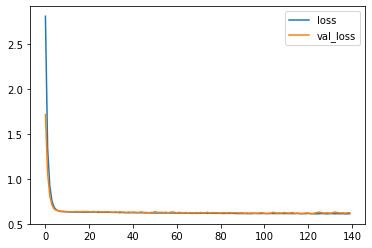

In [69]:
dfMlpHistory = pd.DataFrame(oMlpModel.history.history)

dfMlpHistory[["loss", "val_loss"]].plot()

In [70]:
y_pred_probability = oMlpModel.predict(aPcaTest)

y_pred = np.zeros(y_pred_probability.shape)
y_pred[y_pred_probability >= 0.5] = 1


print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

         0.0       0.71      0.61      0.65      6687
         1.0       0.66      0.75      0.70      6671

    accuracy                           0.68     13358
   macro avg       0.68      0.68      0.68     13358
weighted avg       0.68      0.68      0.68     13358



### Long Short Term Memory

In [71]:
oLstmModel = tf.keras.Sequential()

oLstmModel.add(LSTM(150, activation = "relu", kernel_regularizer=oKernelRegulizer))
oLstmModel.add(Dropout(0.5))
oLstmModel.add(Dense(1, activation='sigmoid'))

oLstmModel.compile(optimizer=oOptimizer, loss='binary_crossentropy', metrics=['accuracy'])

oLstmModel.fit(tf.expand_dims(aPcaTrain, 1), 
                y_train, 
                epochs=c_i_EPOCH_SIZE, 
                batch_size=c_i_BATCH_SIZE, 
                verbose=1, 
                validation_data= (tf.expand_dims(aPcaVal, 1), y_val),
                callbacks=[oEarlyStop]
             )

Epoch 1/1000
58/58 [==============================] - 2s 15ms/step - loss: 1.3656 - accuracy: 0.6408 - val_loss: 0.7246 - val_accuracy: 0.6521
Epoch 2/1000
58/58 [==============================] - 1s 12ms/step - loss: 0.7063 - accuracy: 0.6526 - val_loss: 0.6940 - val_accuracy: 0.6494
Epoch 3/1000
58/58 [==============================] - 1s 12ms/step - loss: 0.6845 - accuracy: 0.6605 - val_loss: 0.6846 - val_accuracy: 0.6408
Epoch 4/1000
58/58 [==============================] - 1s 12ms/step - loss: 0.6745 - accuracy: 0.6599 - val_loss: 0.6689 - val_accuracy: 0.6622
Epoch 5/1000
58/58 [==============================] - 1s 12ms/step - loss: 0.6664 - accuracy: 0.6606 - val_loss: 0.6642 - val_accuracy: 0.6537
Epoch 6/1000
58/58 [==============================] - 1s 12ms/step - loss: 0.6586 - accuracy: 0.6640 - val_loss: 0.6563 - val_accuracy: 0.6713
Epoch 7/1000
58/58 [==============================] - 1s 12ms/step - loss: 0.6565 - accuracy: 0.6637 - val_loss: 0.6535 - val_accuracy: 0.6569

Epoch 57/1000
58/58 [==============================] - 1s 11ms/step - loss: 0.6136 - accuracy: 0.6839 - val_loss: 0.6261 - val_accuracy: 0.6745
Epoch 58/1000
58/58 [==============================] - 1s 11ms/step - loss: 0.6102 - accuracy: 0.6873 - val_loss: 0.6199 - val_accuracy: 0.6879
Epoch 59/1000
58/58 [==============================] - 1s 12ms/step - loss: 0.6108 - accuracy: 0.6858 - val_loss: 0.6271 - val_accuracy: 0.6820
Epoch 60/1000
58/58 [==============================] - 1s 12ms/step - loss: 0.6121 - accuracy: 0.6840 - val_loss: 0.6166 - val_accuracy: 0.6820
Epoch 61/1000
58/58 [==============================] - 1s 13ms/step - loss: 0.6132 - accuracy: 0.6835 - val_loss: 0.6217 - val_accuracy: 0.6793
Epoch 62/1000
58/58 [==============================] - 1s 12ms/step - loss: 0.6125 - accuracy: 0.6836 - val_loss: 0.6258 - val_accuracy: 0.6724
Epoch 63/1000
58/58 [==============================] - 1s 12ms/step - loss: 0.6134 - accuracy: 0.6828 - val_loss: 0.6253 - val_accuracy:

Epoch 114/1000
58/58 [==============================] - 1s 18ms/step - loss: 0.6047 - accuracy: 0.6865 - val_loss: 0.6147 - val_accuracy: 0.6772
Epoch 115/1000
58/58 [==============================] - 1s 18ms/step - loss: 0.6042 - accuracy: 0.6902 - val_loss: 0.6134 - val_accuracy: 0.6766
Epoch 116/1000
58/58 [==============================] - 1s 18ms/step - loss: 0.6041 - accuracy: 0.6899 - val_loss: 0.6181 - val_accuracy: 0.6809
Epoch 117/1000
58/58 [==============================] - 1s 17ms/step - loss: 0.6055 - accuracy: 0.6903 - val_loss: 0.6123 - val_accuracy: 0.6772
Epoch 118/1000
58/58 [==============================] - 1s 18ms/step - loss: 0.6050 - accuracy: 0.6872 - val_loss: 0.6192 - val_accuracy: 0.6793
Epoch 119/1000
58/58 [==============================] - 1s 19ms/step - loss: 0.6034 - accuracy: 0.6901 - val_loss: 0.6135 - val_accuracy: 0.6734
Epoch 120/1000
58/58 [==============================] - 1s 18ms/step - loss: 0.6047 - accuracy: 0.6899 - val_loss: 0.6150 - val_ac

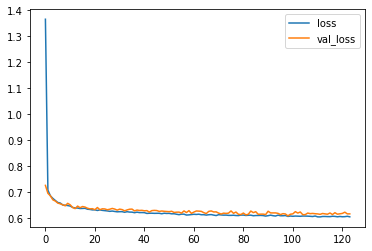

In [72]:
dfLstmHistory = pd.DataFrame(oLstmModel.history.history)

dfLstmHistory[["loss", "val_loss"]].plot()

In [73]:
y_pred_probability = oLstmModel.predict(tf.expand_dims(aPcaTest, 1))

y_pred = np.zeros(y_pred_probability.shape)
y_pred[y_pred_probability >= 0.5] = 1


print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

         0.0       0.70      0.62      0.66      6687
         1.0       0.66      0.73      0.69      6671

    accuracy                           0.68     13358
   macro avg       0.68      0.68      0.68     13358
weighted avg       0.68      0.68      0.68     13358



# NOTES

In [ ]:
# aFpr, aTpr, aThresholds = metrics.roc_curve(y_test, y_pred_probability, pos_label=None)
# fRocAuc = metrics.roc_auc_score(y_test, y_pred_probability)
# sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event")

# plt.figure()
# lw = 2
# plt.plot(aFpr, aTpr, color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % fRocAuc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Ideal')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

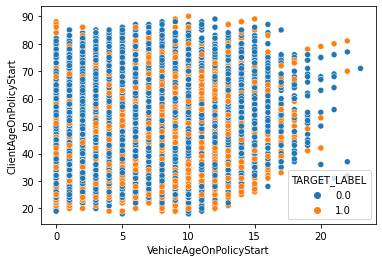

In [74]:
sns.scatterplot(data=dfModelData, x="VehicleAgeOnPolicyStart", y="ClientAgeOnPolicyStart", hue = "TARGET_LABEL")

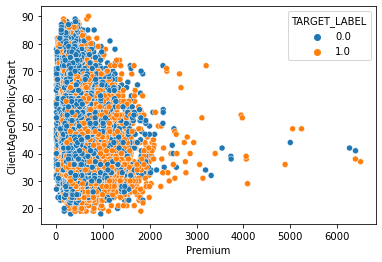

In [75]:
sns.scatterplot(data=dfModelData, x="Premium", y="ClientAgeOnPolicyStart", hue = "TARGET_LABEL")

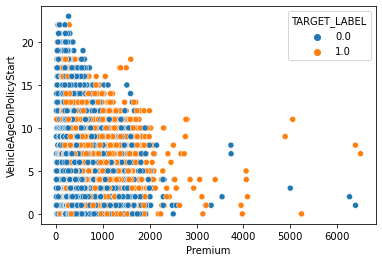

In [77]:
sns.scatterplot(data=dfModelData, x="Premium", y="VehicleAgeOnPolicyStart", hue = "TARGET_LABEL")

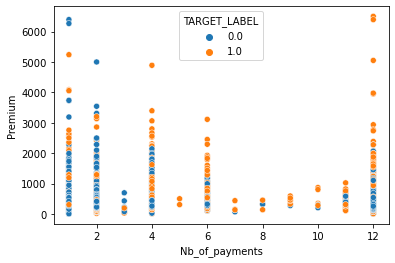

In [76]:
sns.scatterplot(data=dfModelData, x="Nb_of_payments", y="Premium", hue = "TARGET_LABEL")